# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd #импортируем pandas

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #читаем датасет, указываем, что разделитель - "\t", и записываем датасет в переменную data
data.head(15) #выводим на экран первые 15 строк датасета, чтобы ознакомиться с данными

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info() #выведем общую информацию о датасете и узнаем общее количество столбцов и строк, посмотрим на типы данных и наличие/количество пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.duplicated().sum() #проверим, есть ли в датасете явные дубликаты

0

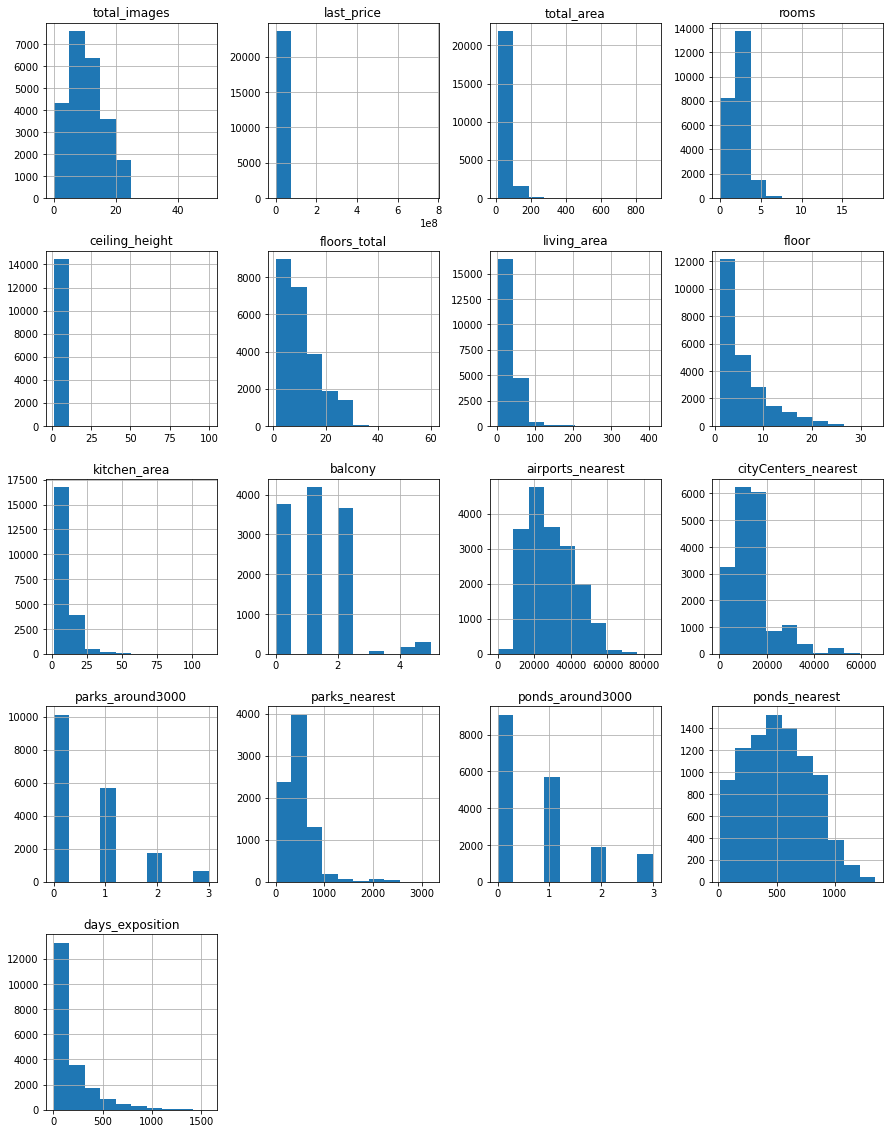

In [ ]:
data.hist(figsize=(15, 20)); #построим гистограммы для всех числовых столбцов датафрейма

**Вывод:** мы ознакомились с датасетом и основной информацией о нём; установили, что явных дубликатов в датасете нет; построили гистограммы для всех числовых столбцов датафрейма.  

### Предобработка данных

**2.1 Работа с пропусками**

In [ ]:
data.isna().sum().sort_values() #посчитаем количество строк с пропусками в каждом столбце

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Первый столбец с пропусками - ceiling_height (высота потолков). В этом столбце более 9000 пропусков - почти 38%. Обычно высота потолков варьируется от 2,5 до 3,5-4 м. Заполним пропуски медианным значением - оно меньше всего подвержено выбросам.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #заполняем пропуски медианным значением столбца

В floors_total (общее количество этажей в доме) всего 86 пропусков (0,4%), в locality_name - 49 пропусков (0,2%). Так как количество пропусков мнимальное, и данные не исказятся, удалим эти строки.

In [ ]:
data = data.dropna(subset=['floors_total', 'locality_name'])

В living_area (жилая площадь) 1909 пропусков, в kitchen_area (площадь кухни) - 2278. Эти данные понадобятся нам для дальнейшего исследования. Узнаем медианное отношение площади кухни и жилой площади к общей площади соответственно, а затем заполним пропуски произведением медианного отношения и общей площади.

In [ ]:
print((data['kitchen_area'] / data['total_area']).median()) #вычисляем медианное отношение площади кухни к общей площади
print((data['living_area'] / data['total_area']).median()) #вычисляем медианное отношение жилой площади к общей площади

0.1723625557206538
0.568210015790661


In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.17) #заполняем пропуски произведением медианного отношения и общей площади
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.57)

В is_apartment (является ли квартира апартаментами) огромное количество пропусков. Скорее всего, все они означают, что квартира - не апартаменты. Заменим все пропуски на False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заполняем пропуски на False

В balcony (количество балконов) также большое количество пропусков, которое свидетельствует о том, что в квартире балкона нет. Заменим все пропуски на 0.

In [ ]:
data['balcony'] = data['balcony'].fillna(0) #заполняем пропуски нулем

В airports_nearest (расстояние до ближайшего аэропорта) и cityCenters_nearest (расстояние до центра Санкт-Петербурга) приблизительно одинаковое количество пропусков. Чаще всего эти значения пропущены для населённых пунктов вне Санкт-Петербурга и, скорее всего, не заполнялись. Оставим эти пропуски, так как сложно предположить логичную замену для них из-за слишком большого разброса данных.

В parks_around3000 (наличие парка в радиусе 3 км) и ponds_around3000 (наличие пруда в радиусе 3 км) пропуски, скорее всего, означают, что таких объектов поблизости нет, поэтому можем заменить пропуски на 0.

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) #заполняем пропуски нулем
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

В parks_nearest (расстояние до ближайшего парка) и ponds_nearest (расстояние до ближайшего пруда) также огромное количество пропусков. Пропуски тут, скорее всего, означают, что парков и прудов поблизости нет, или данные просто не заполнялись. Также оставим пропуски, так как сложно предположить логичную замену для них.

Последний стобец с пропусками - days_exposition (сколько дней было размещено объявление). Оставим эти пропуски, так как сложно предположить логичную замену для них из-за слишком большого разброса данных и зависимости от других факторов - недвижимость может долго не продаваться из-за высокой цены, плохого состояния, неудачного расположения и так далее.

In [ ]:
data.isna().sum() #снова посчитаем количество строк с пропусками в каждом столбце, чтобы убедиться,
#что не осталось пропусков в тех столбцах, где мы их заменяли

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Вывод:** мы заполнили пропуски в тех столбцах, где это представлялось возможным.
Скорее всего, все эти пропуски обусловлены тем, что эти поля были необязательными для заполнения, и часто пользователи пропускали их при подаче объявления. Также в некоторых столбцах (balcony, is_apartment, parks_around3000, ponds_around3000) пропуски предположительно означают "нет" или отсутствие.

**2.2 Работа с типами данных**

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #меняем тип с object на datetime
data['is_apartment'] = data['is_apartment'].astype('bool') #меняем тип с object на bool
data['balcony'] = data['balcony'].astype('int') #здесь и далее меняем тип с float на int
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [ ]:
data.info() #выведем общую информацию, чтобы убедиться, что типы данных были изменены успешно

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Вывод:** мы изменили тип данных некоторых столбцов для удобства работы и более корректного отображения данных. Так, мы изменили тип данных в first_day_exposition с object (строка) на datetime (формат даты и времени), чтобы впоследствии корректно производить операции с датой публикации. В is_apartment мы изменили тип с object (строка) на bool (булев тип), так как в этом столбце содержатся True и False, характерные для булева типа данных. В столбцах balcony, floors_total, parks_around3000 и ponds_around3000 мы изменили тип с float (число с плавающей точкой) на int (целое число), так как в этих столбцах содержатся только целочисленные значения - в квартире не может быть 2,5 балкона, а поблизости не может находиться 1,8 парка. Для days_exposition изменить тип не представляется возможным, так как в этом столбце остались пропуски.

**2.3 Устранение неявных дубликатов**

In [ ]:
data['locality_name'].unique() #выведем и изучим список уникальных названий в столбце с названиями населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
#заменим все дубликаты на единое название "посёлок" или "посёлок станции" с помощью лямбда-функции и регулярных выражений
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'городской поселок': 'посёлок', 'посёлок городского типа': 'посёлок', 'поселок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'коттеджный поселок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

data['locality_name'].unique() #снова выведем все уникальные названия, чтобы убедиться, что замена прошла успешно

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок Лебяжье', 'посёлок Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород',

**Вывод:** мы заменили все неявные дубликаты в столбце с названиями населённых пунктов для более правильного отображения данных.

**2.4 Устранение аномалий**

Рассмотрим наш датасет на наличие аномалий и устраним их. Начнём со столбца ceiling_height (высота потолков).

In [ ]:
print(sorted(data['ceiling_height'].unique())) #выведем все уникальные значения столбца и отсортируем их

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 10.3, 

In [ ]:
#по законодательству потолки не могут быть меньше 2,5 м
#оставим небольшую погрешность в 5 см - пусть минимальная высота потолка будет 2,45 м. узнаем, сколько таких строк в датасете
data.query('ceiling_height <= 2.45')['ceiling_height'].count()

59

In [ ]:
#удалим строки с такими значениями
data = data.query('ceiling_height >= 2.45')

В списке уникальных значений есть 25, 26 и так далее метров. Можно предположить, что пользователь ошибся при вводе и на самом деле это 2,5 м, 2,6 м и так далее. Заменим аномалии на правильные значения.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].replace({25.0:2.5, 26.0:2.6, 27.0:2.7, 27.5:2.75, 32.0:3.2})

In [ ]:
#теперь посмотрим на слишком большие значения. поскольку речь идёт о квартирах, будем считать, что самый высокий потолок - 5 м
#узнаем количество таких строк в датасете
data.query('ceiling_height >= 5')['ceiling_height'].count()

18

In [ ]:
#теперь удалим все слишком большие значения
data = data.query('ceiling_height <= 5')

In [ ]:
print(sorted(data['ceiling_height'].unique())) #снова выведем все уникальные значения столбца, чтобы убедиться, что мы успешно удалили аномалии

[2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0]


Проделаем то же самое для столбца floors_total (общее количество этажей).

In [ ]:
print(sorted(data['floors_total'].unique())) #выведем все уникальные значения столбца и отсортируем их

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 52, 60]


In [ ]:
#согласно гуглу, в самом многоэтажном жилом доме в Санкт-Петербурге 37 этажей
#узнаем, сколько в датасете строк с выдающимися значениями
data.query('floors_total > 37')['floors_total'].count()

2

In [ ]:
#удалим значения больше 37 этажей
data = data.query('floors_total <= 37')

In [ ]:
print(sorted(data['floors_total'].unique())) #снова выведем все уникальные значения столбца, чтобы убедиться, что мы успешно удалили аномалии

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36]


Так как ранее мы заменяли некоторые площади кухонь и жилые площади синтетическими данными, проверим, не получилось ли так, что они оказались больше общей площади.

In [ ]:
data.query('total_area < living_area + kitchen_area') #выводим строки, где общая площадь меньше кухни+жилой площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14,1,2.65,9,26.10,5,False,...,6.2000,0,Санкт-Петербург,13952.0,15031.0,0,NaN,1,824.0,12.0
424,14,11500000.0,98.00,2016-05-10,3,2.65,3,88.00,3,False,...,16.6600,1,Санкт-Петербург,39363.0,13270.0,0,NaN,0,NaN,90.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,False,...,4.6087,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
545,9,4700000.0,23.80,2018-12-28,1,2.65,18,20.00,9,False,...,5.0000,0,Санкт-Петербург,9731.0,11849.0,0,NaN,0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08,1,2.70,19,30.55,2,False,...,9.2800,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.0,27.30,2018-05-29,0,2.70,16,23.30,15,False,...,4.6410,1,Санкт-Петербург,41935.0,9551.0,0,NaN,0,NaN,59.0
22907,9,65000000.0,228.00,2016-06-02,4,2.65,5,200.00,2,False,...,38.7600,0,Санкт-Петербург,22783.0,1295.0,3,619.0,3,269.0,NaN
23102,0,5800000.0,66.00,2017-06-09,5,2.65,5,55.50,1,False,...,11.2200,0,Санкт-Петербург,12007.0,11933.0,0,NaN,0,NaN,21.0
23191,3,1900000.0,18.90,2016-04-04,1,2.65,16,16.00,12,False,...,3.2130,0,Тосно,NaN,NaN,0,NaN,0,NaN,115.0


In [ ]:
data = data.query('total_area > living_area + kitchen_area') #удалим строки с ошибками

**Вывод:** мы устранили аномалии и выбивающиеся значения в некоторых столбцах. Всего мы удалили порядка 200 строк - незначительное количество, которое не исказит данные. В столбцах ceiling_height и floors_total аномалии обусловлены человеческим фактором - ошибками при вводе во время размещения объявления. В столбцах с площадями появление аномалий в большей степени обусловлено тем, что мы заменяли пропуски синтетическими данными.

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
#добавим столбец sq_m_price с ценой одного квадратного метра
#для этого разделим общую стоимость на общий метраж и округлим получившееся число до целого
data['sq_m_price'] = round(data['last_price'] / data['total_area'])

In [ ]:
#добавим столбец weekday с днём недели публикации объявления (где 0 — понедельник, 1 — вторник и так далее) с помощью метода dt.weekday
data['weekday'] = data['first_day_exposition'].dt.weekday

In [ ]:
#добавим столбец month с месяцем публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [ ]:
#добавим столбец year с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
#добавим столбец floor_type с типом этажа квартиры («первый», «последний», «другой»)
#напишем функцию, которая определяет тип этажа в каждой строке, и применим эту функцию к нашему датасету

def type_floor(row):
    try:
        if row['floor'] == 1:
            return('первый')
        elif row['floor'] == row['floors_total']:
            return('последний')
        else:
            return('другой')
    except:
        return('ошибка')

data['floor_type'] = data.apply(type_floor, axis=1)

In [ ]:
#добавим столбец city_center_km с расстоянием до центра города в километрах

data['city_center_km'] = round(data['cityCenters_nearest'] / 1000)

In [ ]:
#выведем первые 5 строк таблицы, чтобы убедиться, что все новые столбцы добавлены успешно
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.63,9,False,...,84.0,3,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

**4.1 Построение гистограмм**

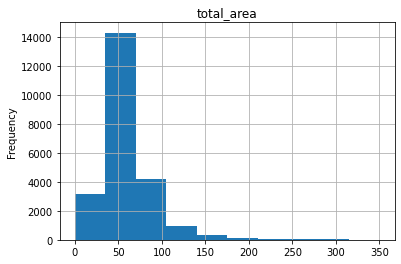

In [ ]:
#построим гистограмму для столбца total_area - общая площадь
data['total_area'].plot(title='total_area', kind='hist', grid=True, range=(0, 350));

Большая часть квартир в датасете (около 14000) - площадью от 45 до 70 квадратных метров.

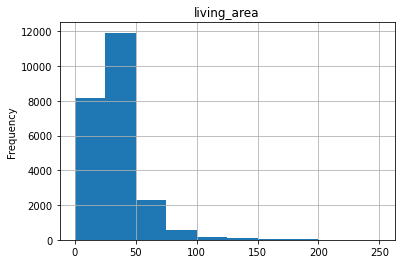

In [ ]:
#построим гистограмму для столбца living_area - жилая площадь
data['living_area'].plot(title='living_area', kind='hist', grid=True, range=(0, 250));

Жилая площадь чаще всего составляет 25-50 квадратных метров.

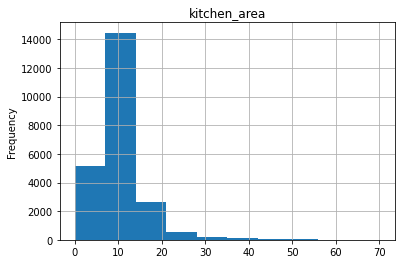

In [ ]:
#построим гистограмму для столбца kitchen_area - площадь кухни
data['kitchen_area'].plot(title='kitchen_area', kind='hist', grid=True, range=(0, 70));

Площадь кухни чаще всего составляет 7-13 квадратных метров.

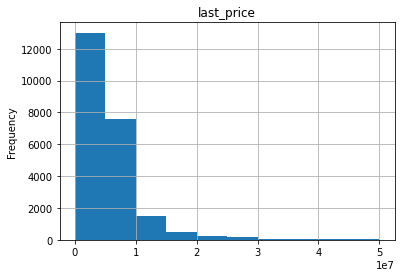

In [ ]:
#построим гистограмму для столбца last_price - цена объекта
data['last_price'].plot(title='last_price', kind='hist', grid=True, range=(0, 50000000));

Большую часть квартир продали меньше, чем за 50 млн.

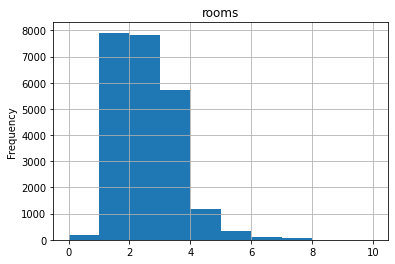

In [ ]:
#построим гистограмму для столбца rooms - количество комнат
data['rooms'].plot(title='rooms', kind='hist', grid=True, range=(0, 10));

Количество двух- и трёхкомнатных квартир почти одинаковое - около 8000, однако и четырёхкомнатных квартир тоже немало - около 6000.

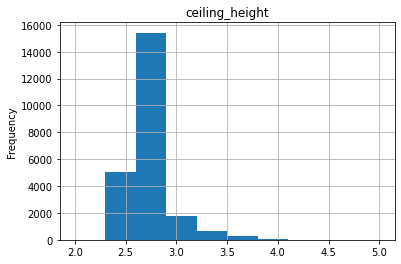

In [ ]:
#построим гистограмму для столбца ceiling_height - высота потолков
data['ceiling_height'].plot(title='ceiling_height', kind='hist', grid=True, range=(2, 5));

В подавляющем большинстве квартир стандартные потолки высотой 2,6-2,9 метров.

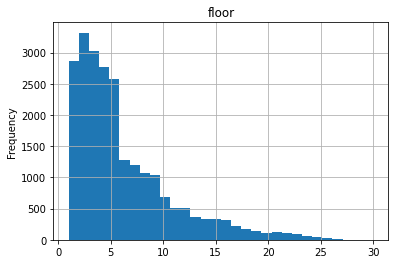

In [ ]:
#построим гистограмму для столбца floor - этаж квартиры
data['floor'].plot(title='floor', kind='hist', grid=True, bins=30, range=(1, 30));

Большая часть квартир находится на 2-3 этаже, следующая за ней группа - 1 и 4-5 этажи.

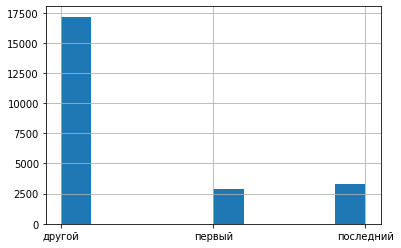

In [ ]:
#построим гистограмму для столбца floor_type - тип этажа квартиры («первый», «последний», «другой»)
data['floor_type'].hist();

Больше всего квартир находятся не на первом и не на последнем этаже.

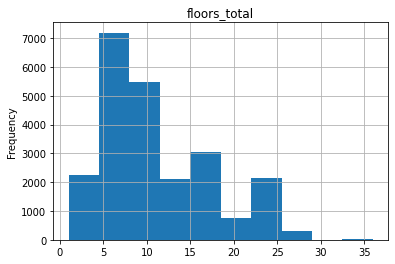

In [ ]:
#построим гистограмму для столбца floors_total - общее количество этажей в доме
data['floors_total'].plot(title='floors_total', kind='hist', grid=True);

Больше всего квартир в домах, в которых от 4 до 7 этажей, следующая за ней группа - дома на 8-11 этажей.

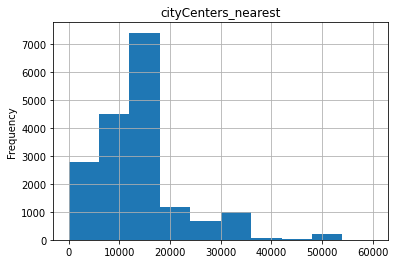

In [ ]:
#построим гистограмму для столбца cityCenters_nearest - расстояние до центра города в метрах
data['cityCenters_nearest'].plot(title='cityCenters_nearest', kind='hist', grid=True, range=(0, 60000));

Большинство квартир, для которых у нас есть данные о расстоянии до центра Санкт-Петербурга, находится в 12-18 км от него.

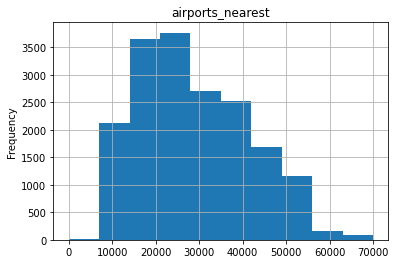

In [ ]:
#построим гистограмму для столбца airports_nearest - расстояние до ближайшего аэропорта
data['airports_nearest'].plot(title='airports_nearest', kind='hist', grid=True, range=(0, 70000));

Большинство квартир, для которых у нас есть данные о расстоянии до ближайшего аэропорта, находится в 21-28 км от него.

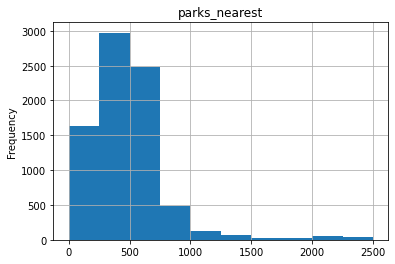

In [ ]:
#построим гистограмму для столбца parks_nearest - расстояние до ближайшего парка
data['parks_nearest'].plot(title='parks_nearest', kind='hist', grid=True, range=(0, 2500));

Большинство квартир, для которых у нас есть данные о расстоянии до ближайшего парка, находится в 250-500 м от него.

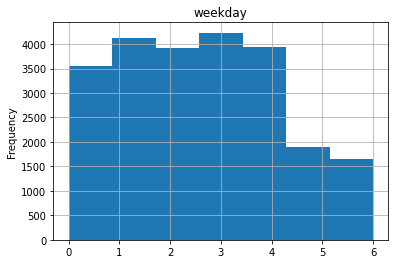

In [ ]:
#построим гистограмму для столбца weekday - день публикации объявления
data['weekday'].plot(title='weekday', kind='hist', grid=True, bins=7);

Самые популярные дни для публикации объявлений - вторник (1) и четверг (3), меньше всего объявлений опубликовали в воскресенье (6).

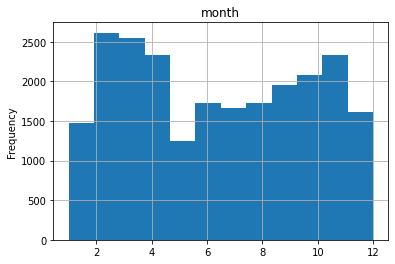

In [ ]:
#построим гистограмму для столбца month - месяц публикации объявления
data['month'].plot(title='month', kind='hist', grid=True, bins=12, range=(1, 12));

Самые популярные месяцы для публикации объявлений - февраль (2) и март (3), меньше всего объявлений опубликовали в мае (5).

**4.2 Как быстро продавались квартиры?**

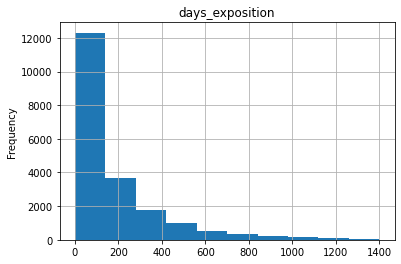

In [ ]:
#построим гистограмму для days_exposition - сколько дней объявление висело на сайте
data['days_exposition'].plot(title='days_exposition', kind='hist', grid=True, range=(0, 1400));

In [ ]:
print(data['days_exposition'].mean()) #посчитаем среднее
print(data['days_exposition'].median()) #посчитаем медиану

181.15839032609773
96.0


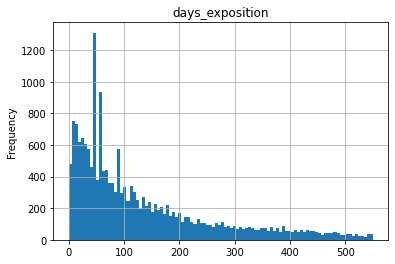

In [ ]:
#посмотрим на ту же гистограмму, но установим ограничение в 1,5 года, чтобы увидеть всплески продаж
data['days_exposition'].plot(title='days_exposition', kind='hist', grid=True, bins=100, range=(0, 550));

Как мы можем видеть на гистограмме, большая часть объявлений висит на сайте до 180 дней. Обычно продажа занимает около 100-150 дней. Быстрыми можно считать продажи в течение 30-60 дней, необычно долгими - более 600 дней. Также наблюдаются всплески продаж в районе 50-70 дней после публикации.

**4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

а) общая площадь

Корреляция общей площади и общей стоимости: 0.6517201590107329
AxesSubplot(0.125,0.125;0.775x0.755)


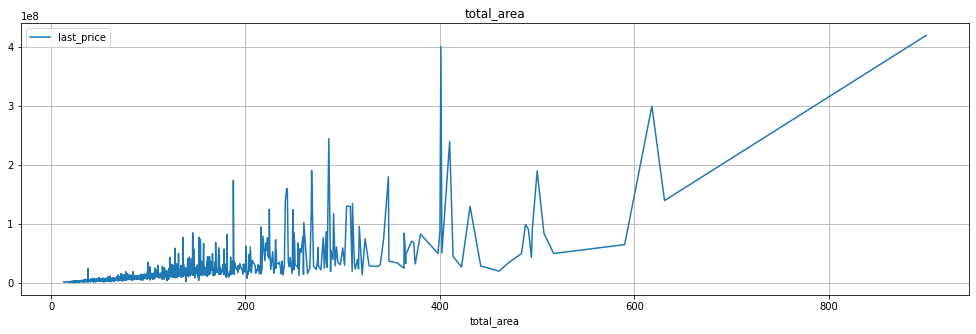

In [ ]:
#вычислим корреляцию общей площади и общей стоимости
print('Корреляция общей площади и общей стоимости:', data['total_area'].corr(data['last_price']))
#и построим график зависимости цены от общей площади квартиры с помощью сводной таблицы
print(data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(title='total_area', grid=True, figsize=(17, 5)))

Действительно существует зависимость между общей площадью и общей стоимостью объекта - чем больше площадь, тем выше цена.

б) жилая площадь

Корреляция жилой площади и общей стоимости: 0.5811652282153836
AxesSubplot(0.125,0.125;0.775x0.755)


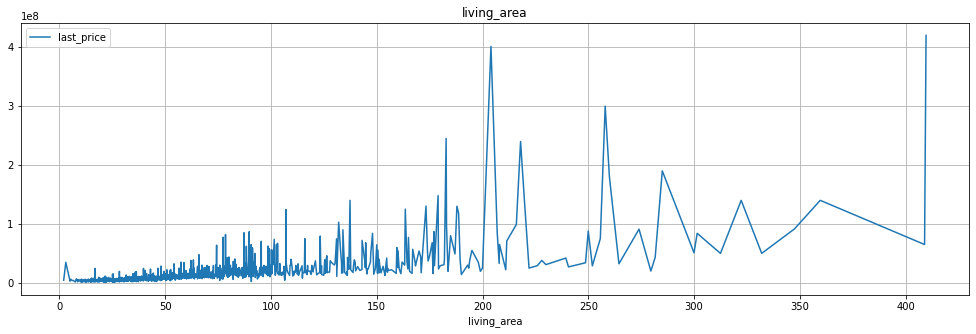

In [ ]:
#вычислим корреляцию жилой площади и общей стоимости
print('Корреляция жилой площади и общей стоимости:', data['living_area'].corr(data['last_price']))
#и построим график зависимости цены от жилой площади квартиры с помощью сводной таблицы
print(data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(title='living_area', grid=True, figsize=(17, 5)))

Также существует чуть менее выраженная положительная корреляция между жилой площадью и общей стоимостью объекта.

в) площадь кухни

Корреляция площади кухни и общей стоимости: 0.5122567125139744
AxesSubplot(0.125,0.125;0.775x0.755)


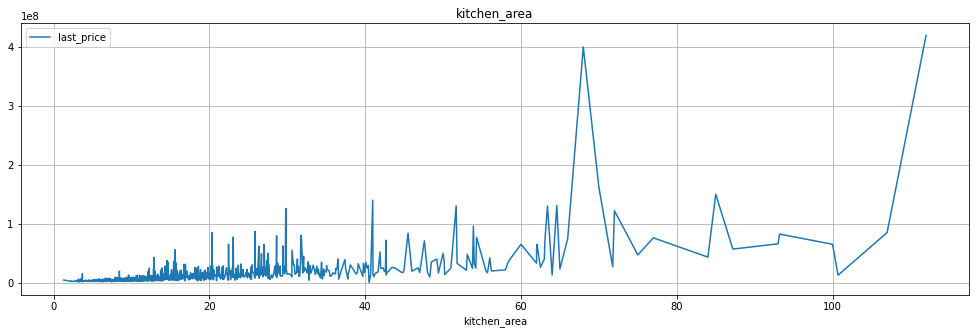

In [ ]:
#вычислим корреляцию площади кухни и общей стоимости
print('Корреляция площади кухни и общей стоимости:', data['kitchen_area'].corr(data['last_price']))
#и построим график зависимости цены от площади кухни квартиры с помощью сводной таблицы
print(data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(title='kitchen_area', grid=True, figsize=(17, 5)))

Существует средняя положительная корреляция между площадью кухни и общей стоимостью квартиры.

г) количество комнат

Корреляция количества комнат и общей стоимости: 0.3609310107867649
AxesSubplot(0.125,0.125;0.775x0.755)


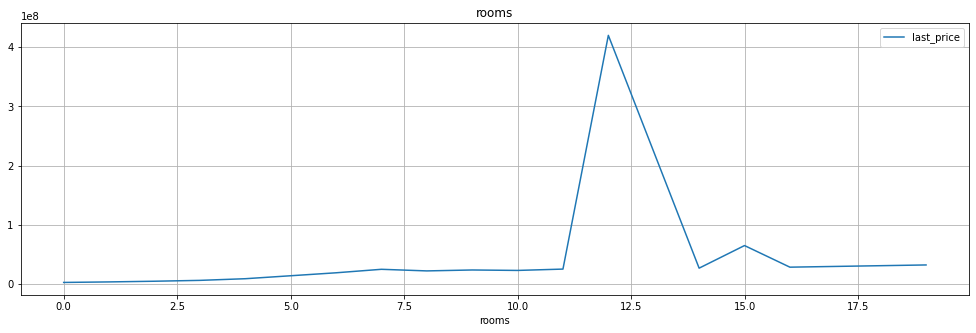

In [ ]:
#вычислим корреляцию количества комнат и общей стоимости
print('Корреляция количества комнат и общей стоимости:', data['rooms'].corr(data['last_price']))
#и построим график зависимости цены от количества комнат квартиры с помощью сводной таблицы
print(data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(title='rooms', grid=True, figsize=(17, 5)))

Нельзя сказать, что есть зависимость между количеством комнат и общей стоимостью объекта.

д) этаж, на котором расположена квартира (первый, последний, другой)

AxesSubplot(0.125,0.125;0.775x0.755)


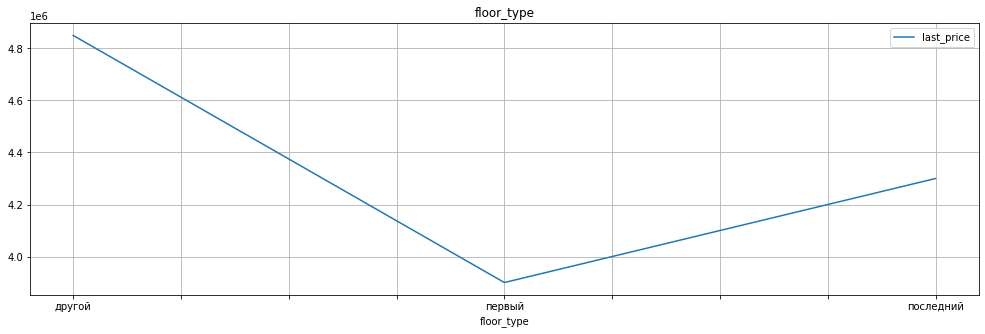

In [ ]:
#построим график зависимости цены от типа этажа с помощью сводной таблицы
print(data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(title='floor_type', grid=True, figsize=(17, 5)))

На графике видно, что самые дешёвые квартиры - на первом этаже, в то время как самые дорогие - на "других" этажах.

е) дата размещения - день недели

Корреляция дня недели публикации объявления и общей стоимости: 0.002028799423210106
AxesSubplot(0.125,0.125;0.775x0.755)


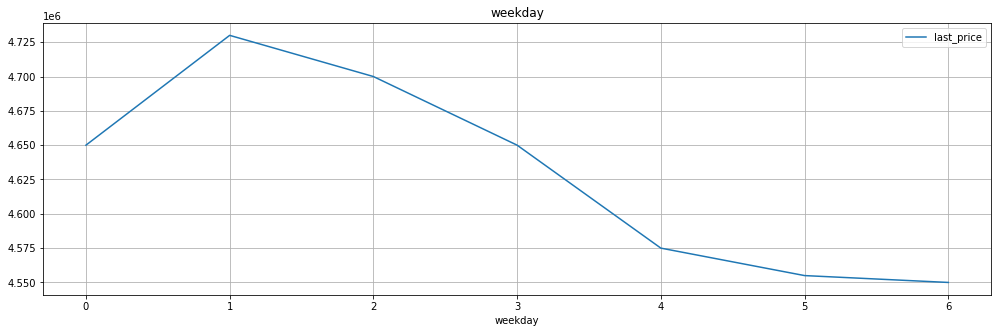

In [ ]:
#вычислим корреляцию дня недели публикации объявления и общей стоимости
print('Корреляция дня недели публикации объявления и общей стоимости:', data['weekday'].corr(data['last_price']))
#и построим график зависимости цены от дня недели публикации объявления с помощью сводной таблицы
print(data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(title='weekday', grid=True, figsize=(17, 5)))

Нет зависимости между днём недели публикации объявления и общей ценой.

ж) дата размещения - месяц

Корреляция месяца публикации объявления и общей стоимости: 0.0014478384000639656
AxesSubplot(0.125,0.125;0.775x0.755)


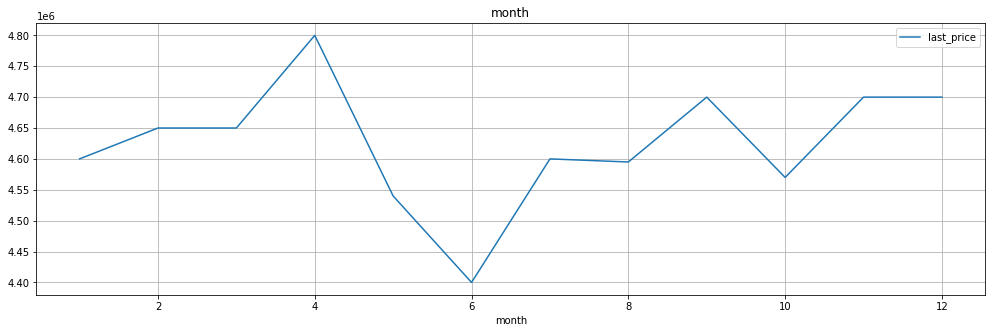

In [ ]:
#вычислим корреляцию месяца публикации объявления и общей стоимости
print('Корреляция месяца публикации объявления и общей стоимости:', data['month'].corr(data['last_price']))
#и построим график зависимости цены от месяца публикации объявления с помощью сводной таблицы
print(data.pivot_table(index='month', values='last_price', aggfunc='median').plot(title='month', grid=True, figsize=(17, 5)))

Также нет зависимости между месяцем публикации объявления и общей ценой.

з) дата размещения - год

Корреляция года публикации объявления и общей стоимости: -0.04240892186436793
AxesSubplot(0.125,0.125;0.775x0.755)


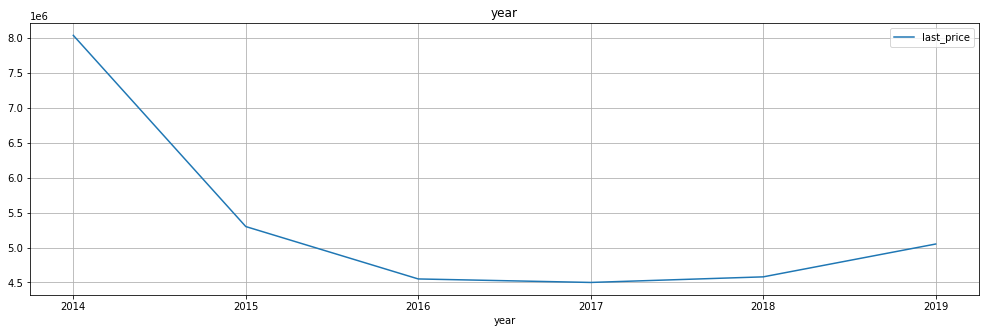

In [ ]:
#вычислим корреляцию года публикации объявления и общей стоимости
print('Корреляция года публикации объявления и общей стоимости:', data['year'].corr(data['last_price']))
#и построим график зависимости цены от года публикации объявления с помощью сводной таблицы
print(data.pivot_table(index='year', values='last_price', aggfunc='median').plot(title='year', grid=True, figsize=(17, 5)))

Также нет выраженной зависимости между годом публикации объявления и общей ценой.

**4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [ ]:
data['locality_name'].value_counts().head(10) #выведем 10 населённых пунктов с наибольшим числом объявлений

Санкт-Петербург      15506
посёлок Мурино         540
посёлок Шушары         438
Всеволожск             389
Пушкин                 365
Колпино                336
посёлок Парголово      326
Гатчина                303
деревня Кудрово        295
Выборг                 232
Name: locality_name, dtype: int64

In [ ]:
#создадим таблицу с объявлениями только в этих населённых пунктах
popular_locality = data.query('locality_name in ["Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг"]')

#теперь создадим сводную таблицу по каждому населённому пункту со средней стоимостью 1 кв.м.
#и отсортируем значения от меньшего к большему
popular_locality.pivot_table(index='locality_name', values='sq_m_price').sort_values('sq_m_price')

,sq_m_price
locality_name,
Выборг,58402.599138
Гатчина,68625.105611
Всеволожск,68649.146530
Колпино,75500.157738
посёлок Шушары,78546.995434
посёлок Мурино,85394.438889
посёлок Парголово,90135.049080
деревня Кудрово,92447.393220
Пушкин,103202.917808


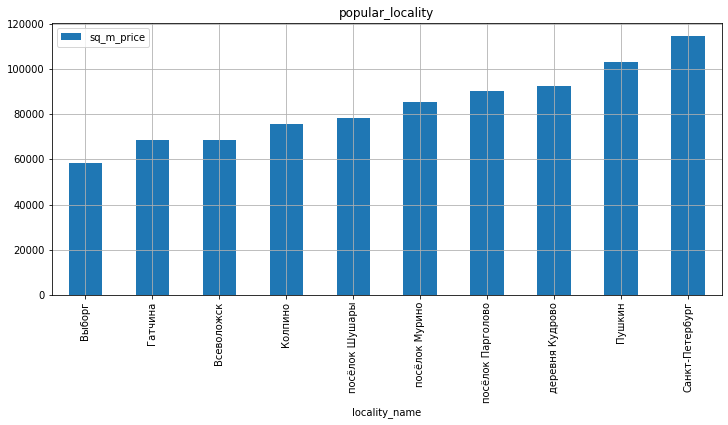

In [ ]:
#построим столбчатую диаграмму на основе получившейся таблицы
popular_locality.pivot_table(index='locality_name', values='sq_m_price').sort_values('sq_m_price').plot(title='popular_locality', kind='bar', grid=True, figsize=(12, 5));

10 населённых пунктов с наибольшим числом объявлений - Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово и Выборг. Самая высокая средняя стоимость 1 кв. м. в Санкт-Петербурге - 114637, самая низкая - в Выборге - 58402.

**4.5 Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [ ]:
#выделим таблицу с квартирами в Санкт-Петербурге с расстоянием от центра больше нуля
spb = data.query('locality_name in "Санкт-Петербург" and city_center_km > 0')
#рассчитаем стоимость 1 км для каждой квартиры и добавим это значение в новый столбец
spb['one_km_price'] = spb['sq_m_price'] / spb['city_center_km']
#сгруппируем квартиры по удалённости от цетра и рассчитаем среднюю цену каждого километра
spb.groupby('city_center_km')['one_km_price'].mean()

/tmp/ipykernel_100/3710148403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['one_km_price'] = spb['sq_m_price'] / spb['city_center_km']


city_center_km
1.0     176637.328042
2.0      78923.402280
3.0      40413.542636
4.0      33243.380307
5.0      27982.112292
6.0      24869.726113
7.0      22309.848214
8.0      15601.742784
9.0      12555.509592
10.0     11266.451192
11.0      9843.018900
12.0      8951.980628
13.0      8312.745414
14.0      7438.001581
15.0      6951.503305
16.0      6271.710050
17.0      5701.488161
18.0      5364.201416
19.0      5187.425127
20.0      5151.821277
21.0      4492.392447
22.0      4147.849389
23.0      3992.545269
24.0      3572.370192
25.0      3677.974400
26.0      3376.879249
27.0      4893.166667
28.0      2898.637755
29.0      2515.637931
Name: one_km_price, dtype: float64

Корреляция расстояния до центра города и общей стоимости: -0.20601494361508177
AxesSubplot(0.125,0.125;0.775x0.755)


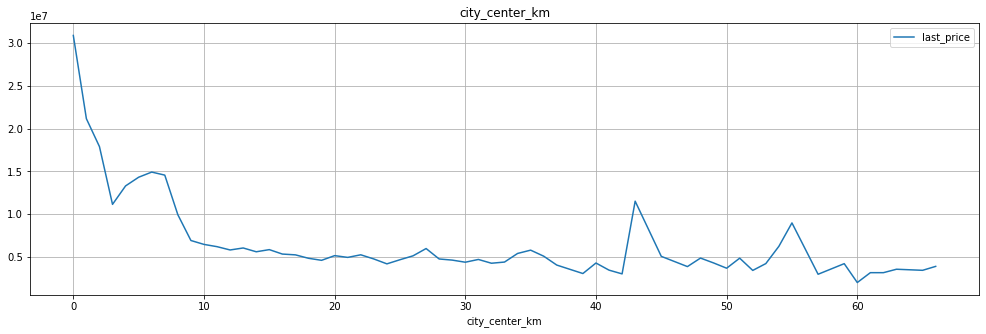

In [ ]:
#вычислим корреляцию расстояния до центра города и общей стоимости
print('Корреляция расстояния до центра города и общей стоимости:', data['city_center_km'].corr(data['last_price']))
#и построим график зависимости цены от расстояния до центра города с помощью сводной таблицы
print(data.pivot_table(index='city_center_km', values='last_price').plot(title='city_center_km', grid=True, figsize=(17, 5)))

Существует слабо выраженная зависимость между расстоянием до центра города и общей стоимостью квартиры: в центре квартиры дороже, чем на окраине. Но также следует помнить, что на стоимость квартиры во многом влияют и другие факторы - общая площадь, этаж и так далее.

### Общий вывод

Мы провели исследование датасета на основе данных сервиса Яндекс Недвижимость.

Мы провели предобработку данных: заполнили пропуски, где это представлялось возможным, заменили тип некоторых данных для удобства работы, удалили неявные дубликаты и аномалии, а также добавили несколько столбцов также для удобства исследования.

Мы сделали следующие выводы:
1) Большинство проданных квартир - двух- и трёхкомнатные, площадью от 45 до 70 квадратных метров, из которых жилая площадь чаще всего составляет 25-50 квадратных метров, а площадь кухни - 7-13 квадратных метров. Высота потолков в них - стандартная, 2,6-2,9 метров. Чаще всего они располагаются на 2-3 этаже. В основном стоимость квартир составляет до 50 миллионов. Больше всего квартир в домах, в которых от 4 до 7 этажей. Большинство квартир, для которых у нас были данные, находится в 12-18 км от центра Санкт-Петербурга и 21-28 км от ближайшего аэропорта. Большинство квартир, для которых у нас есть данные о расстоянии до ближайшего парка, находится в 250-500 м от него.

2) Чаще всего объявления публикуют по вторникам и четвергам, реже всего - по воскресеньям. Самые популярные месяцы для публикации объявлений - февраль и март, меньше всего объявлений опубликовали в мае.

3) Большая часть объявлений висит на сайте до 180 дней. Обычно продажа занимает около 100-150 дней. Быстрыми можно считать продажи в течение 30-60 дней, необычно долгими - более 600 дней.

4) Общая стоимость объекта увеличивается с общей, жилой площадами и площадью кухни. Также дороже квартиры, которые находятся не на первом и не на последнем этажах. Такие факторы, как количество комнат в квартире или день/месяц публикации объявления не влияют на стоимость.

5) В Ленинградской области самая высокая средняя стоимость 1 кв. м. в Санкт-Петербурге - 114637, самая низкая - в Выборге - 58402.

6) В среднем, в центре Санкт-Петербурга квартиры дороже, чем на окраине. Но также следует помнить, что на стоимость квартиры во многом влияют и другие факторы, описанные выше - общая площадь, этаж и так далее.

Рекомендация для сервиса: сделать такие поля, как высота потолков, жилая площадь и площадь кухни, удалённость от центра и ближайшего аэропорта и пр. обязательными для заполнения в целях более точных исследований в будущем.